### Ê°à‰æã‰∏ÄÔºö ÂíñÂï°ÂÜ∑Âç¥Ê∏©Â∫¶È¢ÑÊµã-ÁâõÈ°øÂÜ∑Âç¥ÂÆöÂæãÁöÑÈùûÁ∫øÊÄßÂõûÂΩíÂÆûÁé∞

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
#ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÂíåÊ†∑Âºè
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style(style="darkgrid")

In [3]:
print("=" * 60)
print("Ê°à‰æã‰∏ÄÔºöÂíñÂï°ÂÜ∑Âç¥Ê∏©Â∫¶È¢ÑÊµã")
print("Âü∫‰∫éÁâõÈ°øÂÜ∑Âç¥ÂÆöÂæãÁöÑÈùûÁ∫øÊÄßÂõûÂΩíÂàÜÊûê")
print("=" * 60)

Ê°à‰æã‰∏ÄÔºöÂíñÂï°ÂÜ∑Âç¥Ê∏©Â∫¶È¢ÑÊµã
Âü∫‰∫éÁâõÈ°øÂÜ∑Âç¥ÂÆöÂæãÁöÑÈùûÁ∫øÊÄßÂõûÂΩíÂàÜÊûê


### 1.Êï∞ÊçÆÁîüÊàê‰∏éÊé¢Á¥¢

In [4]:
def generate_coffee_data(n_points = 20, noise_level = 1.0):
    np.random.seed(42)
    
    #ÂèÇÊï∞ËÆæÂÆö
    time_data = np.linspace(0, 60, n_points)  # Êó∂Èó¥‰ªé0Âà∞59ÂàÜÈíü
    T_room = 22  # ÁéØÂ¢ÉÊ∏©Â∫¶22ÊëÑÊ∞èÂ∫¶
    T_initial = 95  # ÂíñÂï°ÂàùÂßãÊ∏©Â∫¶
    k = 0.045  # ÂÜ∑Âç¥Â∏∏Êï∞
    
    #ÁêÜËÆ∫Ê∏©Â∫¶
    true_temp = T_room + (T_initial - T_room) * np.exp(-k * time_data)
    
    #Ê∑ªÂä†ÊµãÈáèËØØÂ∑ÆÔºàÊ®°ÊãüÂÆûÈôÖÊµãÈáèÁöÑ‰∏çÁ°ÆÂÆöÊÄßÔºâ
    noise = np.random.normal(0, noise_level, len(time_data))
    measured_temp = true_temp + noise
    
    return time_data, measured_temp, true_temp, (T_room, T_initial, k)

# ÁîüÊàêÊï∞ÊçÆ
time_data, measured_temp, true_temp, true_params = generate_coffee_data(n_points=25, noise_level=1.2)

#ÂàõÂª∫Êï∞ÊçÆÂ∫ì
df = pd.DataFrame({
    'Êó∂Èó¥ÔºàÂàÜÈíüÔºâ': time_data,
    'ÊµãÈáèÊ∏©Â∫¶ (¬∞C)': measured_temp,
    'ÁúüÂÆûÊ∏©Â∫¶(¬∞C)': true_temp,
    'Ê∏©Â∫¶Â∑Æ': measured_temp - true_temp
})

In [5]:
print("\n ÂíñÂï°ÂÜ∑Âç¥ÂÆûÈ™åÊï∞ÊçÆÈ¢ÑËßàÔºö")
print(df.head(10))

print("\n Êï∞ÊçÆÁªüËÆ°‰ø°ÊÅØÔºö")
print(f'ÊµãÈáèÊó∂Èó¥ËåÉÂõ¥Ôºö{df["Êó∂Èó¥ÔºàÂàÜÈíüÔºâ"].min():.1f} - {df["Êó∂Èó¥ÔºàÂàÜÈíüÔºâ"].max():.1f} ÂàÜÈíü')
print(f'ÊµãÈáèÊ∏©Â∫¶ËåÉÂõ¥Ôºö{df["ÊµãÈáèÊ∏©Â∫¶ (¬∞C)"].min():.1f} - {df["ÊµãÈáèÊ∏©Â∫¶ (¬∞C)"].max():.1f} ¬∞C')
print(f'Âπ≥ÂùáÊµãÈáèËØØÂ∑ÆÔºö{np.mean(np.abs(df["Ê∏©Â∫¶Â∑Æ"])):.2f} ¬∞C')


 ÂíñÂï°ÂÜ∑Âç¥ÂÆûÈ™åÊï∞ÊçÆÈ¢ÑËßàÔºö
   Êó∂Èó¥ÔºàÂàÜÈíüÔºâ  ÊµãÈáèÊ∏©Â∫¶ (¬∞C)   ÁúüÂÆûÊ∏©Â∫¶(¬∞C)       Ê∏©Â∫¶Â∑Æ
0     0.0  95.596057  95.000000  0.596057
1     2.5  87.066689  87.232606 -0.165917
2     5.0  81.068910  80.291684  0.777226
3     7.5  75.916930  74.089294  1.827636
4    10.0  68.265871  68.546855 -0.280984
5    12.5  63.313182  63.594146 -0.280964
6    15.0  61.063474  59.168419  1.895055
7    17.5  56.134522  55.213600  0.920922
8    20.0  51.116216  51.679585 -0.563369
9    22.5  49.172671  48.521599  0.651072

 Êï∞ÊçÆÁªüËÆ°‰ø°ÊÅØÔºö
ÊµãÈáèÊó∂Èó¥ËåÉÂõ¥Ôºö0.0 - 60.0 ÂàÜÈíü
ÊµãÈáèÊ∏©Â∫¶ËåÉÂõ¥Ôºö25.8 - 95.6 ¬∞C
Âπ≥ÂùáÊµãÈáèËØØÂ∑ÆÔºö0.93 ¬∞C


### 2.Êï∞ÊçÆÂèØËßÜÂåñ

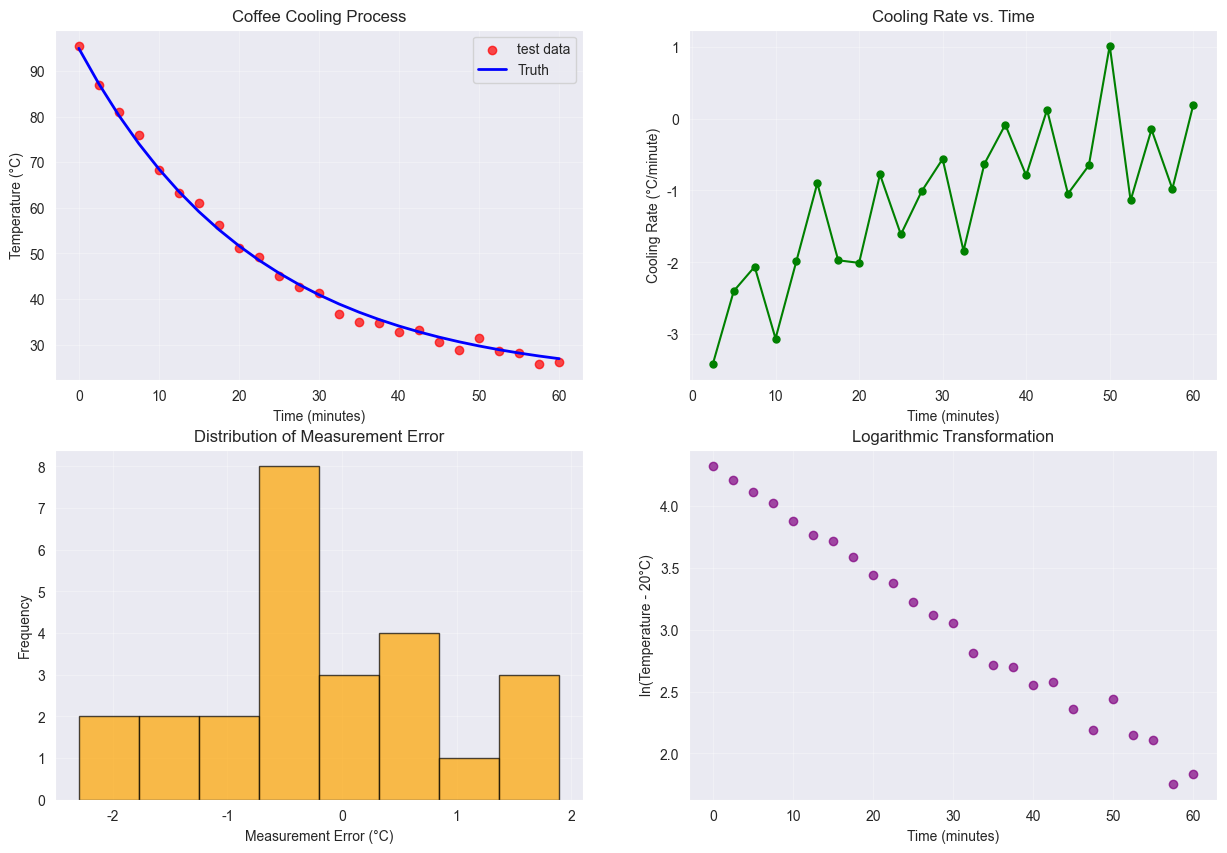

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#ÂéüÂßãÊï∞ÊçÆÊï£ÁÇπÂõæ
axes[0, 0].scatter(df['Êó∂Èó¥ÔºàÂàÜÈíüÔºâ'], df['ÊµãÈáèÊ∏©Â∫¶ (¬∞C)'], color='r', label='test data', alpha=0.7)
axes[0, 0].plot(df['Êó∂Èó¥ÔºàÂàÜÈíüÔºâ'], df['ÁúüÂÆûÊ∏©Â∫¶(¬∞C)'], color='blue', label='Truth', linewidth=2)
axes[0, 0].set_xlabel('Time (minutes)')
axes[0, 0].set_ylabel('Temperature (¬∞C)')
axes[0, 0].set_title('Coffee Cooling Process')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha = 0.3)

#Ê∏©Â∫¶ÈöèÊó∂Èó¥ÂèòÂåñÁéá
temp_diff = np.diff(measured_temp)
time_diff = np.diff(time_data)
cooling_rate = temp_diff / time_diff

axes[0, 1].plot(time_data[1:], cooling_rate, 'o-', color='green', markersize=5)
axes[0, 1].set_xlabel('Time (minutes)')
axes[0, 1].set_ylabel('Cooling Rate (¬∞C/minute)')
axes[0, 1].set_title('Cooling Rate vs. Time')
axes[0, 1].grid(True, alpha = 0.3)

#ÊµãÈáèËØØÂ∑ÆÂàÜÂ∏É
axes[1, 0].hist(df['Ê∏©Â∫¶Â∑Æ'], bins=8, color='orange', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Measurement Error (¬∞C)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Measurement Error')
axes[1, 0].grid(True, alpha = 0.3)

#Ê∏©Â∫¶vsÊó∂Èó¥ÁöÑÂØπÊï∞ÂÖ≥Á≥ª
axes[1, 1].scatter(df['Êó∂Èó¥ÔºàÂàÜÈíüÔºâ'], np.log(df['ÊµãÈáèÊ∏©Â∫¶ (¬∞C)'] - 20), color='purple', alpha=0.7)
axes[1, 1].set_xlabel('Time (minutes)')
axes[1, 1].set_ylabel('ln(Temperature - 20¬∞C)')
axes[1, 1].set_title('Logarithmic Transformation')
axes[1, 1].grid(True, alpha = 0.3)

plt.tight_layout
plt.show()


### 3.ÂÆö‰πâÈùûÁ∫øÊÄßÂõûÂΩíÊ®°Âûã

In [7]:
def newton_cooling_model(t, T_room, T_diff, k):
    '''
    ÁâõÈ°øÂÜ∑Âç¥ÂÆöÂæãÊ®°Âûã
    T(t) = T_room + T_diff * exp(-k * t)
    
    ÂèÇÊï∞Ôºö
    t: Êó∂Èó¥ÔºàÂàÜÈíüÔºâ
    T_room: ÁéØÂ¢ÉÊ∏©Â∫¶Ôºà¬∞CÔºâ
    T_diff: ÂàùÂßãÊ∏©Â∑ÆÔºà¬∞CÔºâ
    k: ÂÜ∑Âç¥Â∏∏Êï∞
    '''
    
    return T_room + T_diff * np.exp(-k * t)

def exponential_decay_model(t, a, b, c):
    '''
    ÊåáÊï∞Ë°∞ÂáèÊ®°Âûã
    T(t) = a + b * exp(-c * t)
    '''
    return a + b * np.exp(-c * t)

### 4.ÂèÇÊï∞‰º∞ËÆ°

In [8]:
print("\n Ê®°ÂûãÊãüÂêà‰∏éÂèÇÊï∞‰º∞ËÆ°")
print("=" * 30)

#ÊñπÊ≥ï1ÔºöÁõ¥Êé•‰ΩøÁî®ÁâõÈ°øÂÜ∑Âç¥ÂÆöÂæã
print("\n ÊñπÊ≥ï1ÔºöÁâõÈ°øÂÜ∑Âç¥ÂÆöÂæãÊãüÂêà")

#Êô∫ËÉΩÂàùÂÄºËÆæÂÆö
T_room_init = min(measured_temp) #ÊúÄ‰ΩéÊ∏©Â∫¶‰Ωú‰∏∫ÂÆ§Ê∏©‰º∞ËÆ°
T_diff_init = max(measured_temp) - T_room_init #ÂàùÂßãÊ∏©Â∑Æ‰º∞ËÆ°
K_init = 0.05 #ÁªèÈ™åÂÄº

initial_guess_1 = [T_room_init, T_diff_init, K_init]
print(f"ÂàùÂßãÂèÇÊï∞ÁåúÊµã: T_room={T_room_init:.1f}, T_diff={T_diff_init:.1f}, k={K_init:.3f}")

try:
    #ÂèÇÊï∞ÊãüÂêà
    popt_1, pcov_1 = curve_fit(newton_cooling_model, time_data, measured_temp, p0=initial_guess_1, maxfev=10000)
    
    #È¢ÑÊµã
    y_pred_1 = newton_cooling_model(time_data, *popt_1)
    
    #ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
    r2_1 = r2_score(measured_temp, y_pred_1)
    rmse_1 = np.sqrt(mean_squared_error(measured_temp, y_pred_1))
    mae_1 = mean_absolute_error(measured_temp, y_pred_1)
    
    print(f"ÊãüÂêàÂèÇÊï∞: T_room={popt_1[0]:.2f}, T_diff={popt_1[1]:.2f}, k={popt_1[2]:.4f}")
    print(f"ËØÑ‰º∞ÊåáÊ†á: R¬≤={r2_1:.4f}, RMSE={rmse_1:.2f}¬∞C, MAE={mae_1:.2f}¬∞C")
    
    #ÂèÇÊï∞Ê†áÂáÜËØØÂ∑Æ
    params_std_1 = np.sqrt(np.diag(pcov_1))
    print(f"ÂèÇÊï∞Ê†áÂáÜËØØÂ∑Æ: T_room_std=¬±{params_std_1[0]:.2f}, T_diff_std=¬±{params_std_1[1]:.2f}, k_std=¬±{params_std_1[2]:.4f}")
    
except RuntimeError as e:
    print("ÊãüÂêàÂ§±Ë¥•:", e)
    
#ÊñπÊ≥ï2Ôºö‰ΩøÁî®ÈÄöÁî®ÊåáÊï∞Ë°∞ÂáèÊ®°Âûã
print("\n ÊñπÊ≥ï2ÔºöÈÄöÁî®ÊåáÊï∞Ë°∞ÂáèÊ®°ÂûãÊãüÂêà")

#Êô∫ËÉΩÂàùÂÄºËÆæÂÆö
initial_guess_2 = [T_room_init, T_diff_init, K_init]

try:
    popt_2, pcov_2 = curve_fit(exponential_decay_model, time_data, measured_temp, p0=initial_guess_2, maxfev=10000)
    
    y_pred_2 = exponential_decay_model(time_data, *popt_2)
    
    r2_2 = r2_score(measured_temp, y_pred_2)
    rmse_2 = np.sqrt(mean_squared_error(measured_temp, y_pred_2))
    mae_2 = mean_absolute_error(measured_temp, y_pred_2)
    
    print(f"ÊãüÂêàÂèÇÊï∞: a={popt_2[0]:.2f}, b={popt_2[1]:.2f}, c={popt_2[2]:.4f}")
    print(f"ËØÑ‰º∞ÊåáÊ†á: R¬≤={r2_2:.4f}, RMSE={rmse_2:.2f}¬∞C, MAE={mae_2:.2f}¬∞C")

except RuntimeError as e:
    print("ÊãüÂêàÂ§±Ë¥•:", e)



 Ê®°ÂûãÊãüÂêà‰∏éÂèÇÊï∞‰º∞ËÆ°

 ÊñπÊ≥ï1ÔºöÁâõÈ°øÂÜ∑Âç¥ÂÆöÂæãÊãüÂêà
ÂàùÂßãÂèÇÊï∞ÁåúÊµã: T_room=25.8, T_diff=69.8, k=0.050
ÊãüÂêàÂèÇÊï∞: T_room=20.90, T_diff=74.92, k=0.0445
ËØÑ‰º∞ÊåáÊ†á: R¬≤=0.9975, RMSE=1.01¬∞C, MAE=0.83¬∞C
ÂèÇÊï∞Ê†áÂáÜËØØÂ∑Æ: T_room_std=¬±0.91, T_diff_std=¬±0.87, k_std=¬±0.0016

 ÊñπÊ≥ï2ÔºöÈÄöÁî®ÊåáÊï∞Ë°∞ÂáèÊ®°ÂûãÊãüÂêà
ÊãüÂêàÂèÇÊï∞: a=20.90, b=74.92, c=0.0445
ËØÑ‰º∞ÊåáÊ†á: R¬≤=0.9975, RMSE=1.01¬∞C, MAE=0.83¬∞C


### 5.Ê®°ÂûãÊØîËæÉ‰∏éÂèØËßÜÂåñ


 Model Comparison
True Parameters vs. Estimated Parameters
T_room: True Value=22.00¬∞C, Estimated Value=20.90¬∞C
T_diff: True Value=73.0¬∞C, Estimated Value=74.9¬∞C
k: True Value=0.0450, Estimated Value=0.0445


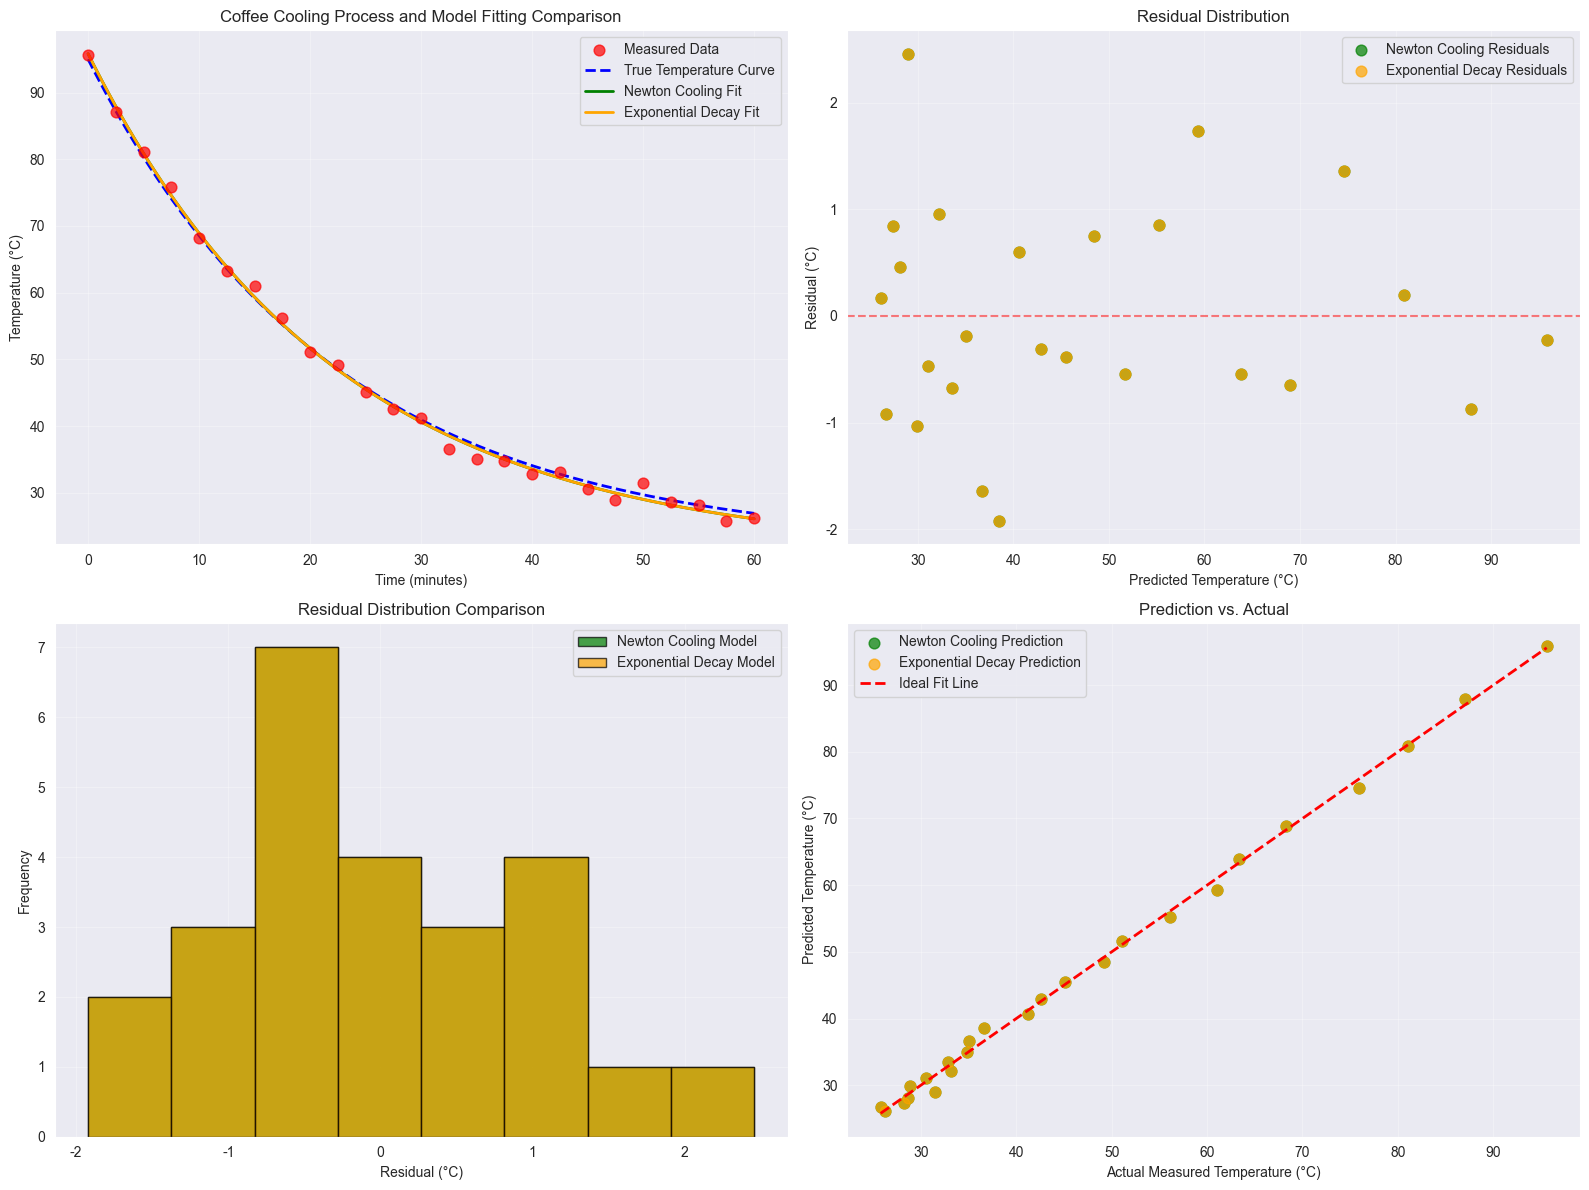

In [9]:
# Model comparison and visualization
print("\n Model Comparison")
print("=" * 30)

# Compare true parameters with estimated parameters
print("True Parameters vs. Estimated Parameters")
print(f"T_room: True Value={true_params[0]:.2f}¬∞C, Estimated Value={popt_1[0]:.2f}¬∞C")
print(f"T_diff: True Value={true_params[1] - true_params[0]:.1f}¬∞C, Estimated Value={popt_1[1]:.1f}¬∞C")
print(f"k: True Value={true_params[2]:.4f}, Estimated Value={popt_1[2]:.4f}")

# Create a detailed model comparison plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Comparison of fitting results
time_plot = np.linspace(0, 60, 200)
y_true_plot = newton_cooling_model(time_plot, true_params[0], true_params[1] - true_params[0], true_params[2])
y_pred_1_plot = newton_cooling_model(time_plot, *popt_1)
y_pred_2_plot = exponential_decay_model(time_plot, *popt_2)

axes[0, 0].scatter(df['Êó∂Èó¥ÔºàÂàÜÈíüÔºâ'], df['ÊµãÈáèÊ∏©Â∫¶ (¬∞C)'], color='r', label='Measured Data', alpha=0.7, s=60, zorder=5)
axes[0, 0].plot(time_plot, y_true_plot, color='blue', label='True Temperature Curve', linewidth=2, linestyle='--')
axes[0, 0].plot(time_plot, y_pred_1_plot, color='green', label='Newton Cooling Fit', linewidth=2)
axes[0, 0].plot(time_plot, y_pred_2_plot, color='orange', label='Exponential Decay Fit', linewidth=2)
axes[0, 0].set_xlabel('Time (minutes)')
axes[0, 0].set_ylabel('Temperature (¬∞C)')
axes[0, 0].set_title('Coffee Cooling Process and Model Fitting Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha = 0.3)

# Residual analysis
residuals_1 = measured_temp - y_pred_1
residuals_2 = measured_temp - y_pred_2

axes[0, 1].scatter(y_pred_1, residuals_1, color='green', label='Newton Cooling Residuals', alpha=0.7, s=60)
axes[0, 1].scatter(y_pred_2, residuals_2, color='orange', label='Exponential Decay Residuals', alpha=0.7, s=60)
axes[0, 1].axhline(0, color='red', linestyle='--', alpha=0.5)
axes[0, 1].set_xlabel('Predicted Temperature (¬∞C)')
axes[0, 1].set_ylabel('Residual (¬∞C)')
axes[0, 1].set_title('Residual Distribution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha = 0.3)

# Error distribution
axes[1, 0].hist(residuals_1, bins=8, color='green', alpha=0.7, edgecolor='black', label='Newton Cooling Model')
axes[1, 0].hist(residuals_2, bins=8, color='orange', alpha=0.7, edgecolor='black', label='Exponential Decay Model')
axes[1, 0].set_xlabel('Residual (¬∞C)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Residual Distribution Comparison')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha = 0.3)

# Prediction vs. Actual
axes[1, 1].scatter(measured_temp, y_pred_1, color='green', label='Newton Cooling Prediction', alpha=0.7, s=60)
axes[1, 1].scatter(measured_temp, y_pred_2, color='orange', label='Exponential Decay Prediction', alpha=0.7, s=60)
axes[1, 1].plot([min(measured_temp), max(measured_temp)], [min(measured_temp), max(measured_temp)], 'r--', label='Ideal Fit Line', linewidth = 2)
axes[1, 1].set_xlabel('Actual Measured Temperature (¬∞C)')
axes[1, 1].set_ylabel('Predicted Temperature (¬∞C)')
axes[1, 1].set_title('Prediction vs. Actual')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha = 0.3)

plt.tight_layout()
plt.show()

### 6.Ê®°ÂûãËØäÊñ≠

In [10]:
#6. Ê®°ÂûãËØäÊñ≠
print("\n Ê®°ÂûãËØäÊñ≠")
print("-" * 40)

#ÊÆãÂ∑ÆÊ≠£ÊÄÅÊÄßÊ£ÄÈ™å
from scipy import stats

#Shapiro-WilkÊ≠£ÊÄÅÊÄßÊ£ÄÈ™å
stat_1, p_value_1 = stats.shapiro(residuals_1)
stat_2, p_value_2 = stats.shapiro(residuals_2)

print("ÊÆãÂ∑ÆÊ≠£ÊÄÅÊÄßÊ£ÄÈ™å (Shapiro-Wilk Test):")
print(f"ÁâõÈ°øÂÜ∑Âç¥Ê®°ÂûãÔºöÁªüËÆ°Èáè={stat_1:.4f}, pÂÄº={p_value_1:.4f}")
print(f"ÊåáÊï∞Ë°∞ÂáèÊ®°ÂûãÔºöÁªüËÆ°Èáè={stat_2:.4f}, pÂÄº={p_value_2:.4f}")
print("Ê≥®ÔºöpÂÄº > 0.05 Ë°®ÊòéÊÆãÂ∑ÆÁ¨¶ÂêàÊ≠£ÊÄÅÂàÜÂ∏ÉÂÅáËÆæ")

#ÊÆãÂ∑ÆËá™Áõ∏ÂÖ≥ÊÄßÊ£ÄÈ™å
def durbin_waston_test(residuals):
    '''Durbin-WatsonÈ™åËØÅÁªüËÆ°Èáè'''
    n = len(residuals)
    if n < 2:
        return None
    
    diff_residuals = np.diff(residuals)
    sum_sqared_diff = np.sum(diff_residuals**2)
    sum_sqared_residuals = np.sum(residuals**2)
    
    dw = sum_sqared_diff / sum_sqared_residuals
    return dw

dw_1 = durbin_waston_test(residuals_1)
dw_2 = durbin_waston_test(residuals_2)

print("\n ÊÆãÂ∑ÆËá™Áõ∏ÂÖ≥ÊÄßÊ£ÄÈ™å (Durbin-Watson Test):")
print(f"ÁâõÈ°øÂÜ∑Âç¥Ê®°ÂûãÔºöDW={dw_1:.4f}")
print(f"ÊåáÊï∞Ë°∞ÂáèÊ®°ÂûãÔºöDW={dw_2:.4f}")
print("Ê≥®ÔºöDW=2Ë°®Á§∫Êó†Ëá™Áõ∏ÂÖ≥Ôºå0<DW<2Ë°®Á§∫Ê≠£Áõ∏ÂÖ≥Ôºå2<DW<4Ë°®Á§∫Ë¥üÁõ∏ÂÖ≥")
    


 Ê®°ÂûãËØäÊñ≠
----------------------------------------
ÊÆãÂ∑ÆÊ≠£ÊÄÅÊÄßÊ£ÄÈ™å (Shapiro-Wilk Test):
ÁâõÈ°øÂÜ∑Âç¥Ê®°ÂûãÔºöÁªüËÆ°Èáè=0.9766, pÂÄº=0.8100
ÊåáÊï∞Ë°∞ÂáèÊ®°ÂûãÔºöÁªüËÆ°Èáè=0.9766, pÂÄº=0.8100
Ê≥®ÔºöpÂÄº > 0.05 Ë°®ÊòéÊÆãÂ∑ÆÁ¨¶ÂêàÊ≠£ÊÄÅÂàÜÂ∏ÉÂÅáËÆæ

 ÊÆãÂ∑ÆËá™Áõ∏ÂÖ≥ÊÄßÊ£ÄÈ™å (Durbin-Watson Test):
ÁâõÈ°øÂÜ∑Âç¥Ê®°ÂûãÔºöDW=2.0792
ÊåáÊï∞Ë°∞ÂáèÊ®°ÂûãÔºöDW=2.0792
Ê≥®ÔºöDW=2Ë°®Á§∫Êó†Ëá™Áõ∏ÂÖ≥Ôºå0<DW<2Ë°®Á§∫Ê≠£Áõ∏ÂÖ≥Ôºå2<DW<4Ë°®Á§∫Ë¥üÁõ∏ÂÖ≥


### 7.‰∫§ÂèâÈ™åËØÅ


‚úÖ ‰∫§ÂèâÈ™åËØÅ
----------------------------------------
ÁâõÈ°øÂÜ∑Âç¥Ê®°Âûã‰∫§ÂèâÈ™åËØÅÁªìÊûú:
R¬≤: 0.8939 ¬± 0.2030
RMSE: 1.16 ¬± 0.36 ¬∞C

üîÆ Êú™Êù•Ê∏©Â∫¶È¢ÑÊµã
----------------------------------------
Êú™Êù•Ê∏©Â∫¶È¢ÑÊµãÁªìÊûú:
    Êó∂Èó¥(ÂàÜÈíü)   È¢ÑÊµãÊ∏©Â∫¶(¬∞C)  95%ÁΩÆ‰ø°Âå∫Èó¥‰∏ãÁïå  95%ÁΩÆ‰ø°Âå∫Èó¥‰∏äÁïå    È¢ÑÊµãÂå∫Èó¥ÂÆΩÂ∫¶
0     60.0  26.088595  24.157723  28.134506  3.976783
1     62.5  25.542636  23.604220  27.589437  3.985217
2     65.0  25.054177  23.142311  27.076625  3.934314
3     67.5  24.617162  22.736096  26.649513  3.913417
4     70.0  24.226172  22.374286  26.263792  3.889506
5     72.5  23.876360  22.066193  25.880263  3.814070
6     75.0  23.563390  21.789259  25.563391  3.774132
7     77.5  23.283381  21.508915  25.258574  3.749659
8     80.0  23.032862  21.279812  24.980785  3.700972
9     82.5  22.808727  21.054919  24.723882  3.668963
10    85.0  22.608198  20.864361  24.512048  3.647688
11    87.5  22.428788  20.702785  24.330813  3.628028
12    90.0 

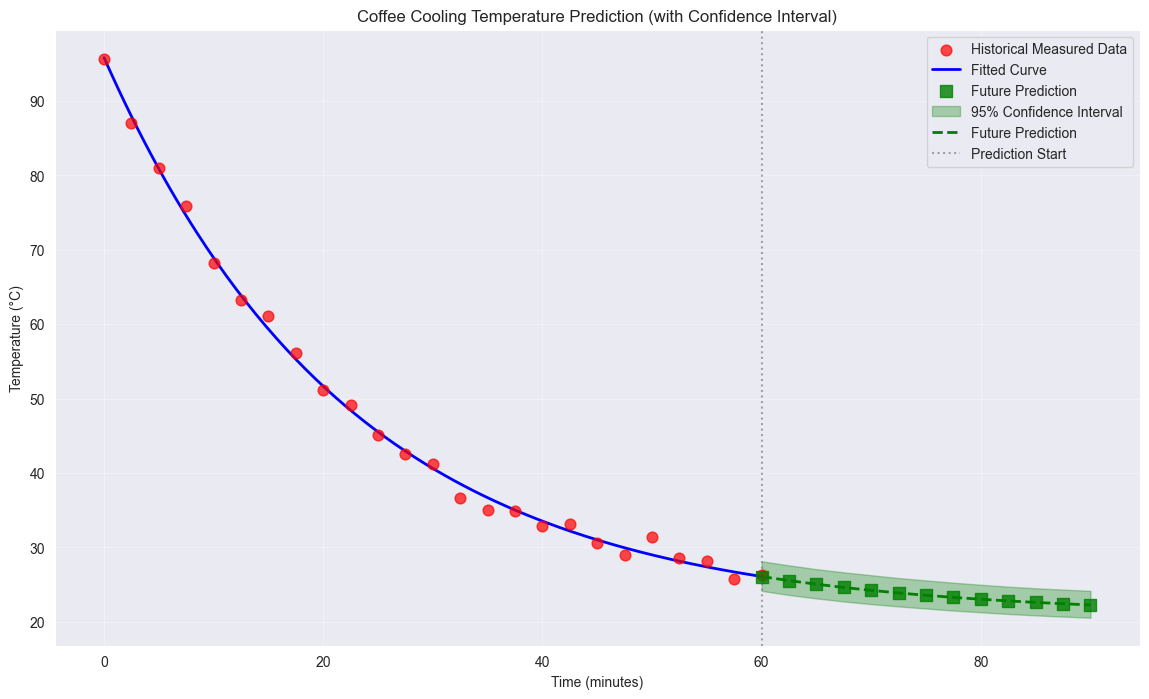


üî¨ Áâ©ÁêÜÊÑè‰πâËß£Èáä
----------------------------------------
‰º∞ËÆ°ÁöÑÂÆ§Ê∏©: 20.9¬∞C
‰º∞ËÆ°ÁöÑÂàùÂßãÊ∏©Â∫¶: 95.8¬∞C
‰º∞ËÆ°ÁöÑÂÜ∑Âç¥Á≥ªÊï∞: 0.0445 min‚Åª¬π
ÂÜ∑Âç¥ÂçäË°∞Êúü: 15.6ÂàÜÈíü
ÈôçÂà∞25.9¬∞CÈúÄË¶Å: 60.8ÂàÜÈíü

üìã Ê®°ÂûãÊÄªÁªìÊä•Âëä
üéØ Ê®°ÂûãÊÄßËÉΩ:
   ‚Ä¢ ÊãüÂêà‰ºòÂ∫¶ (R¬≤): 0.9975
   ‚Ä¢ ÂùáÊñπÊ†πËØØÂ∑Æ (RMSE): 1.01¬∞C
   ‚Ä¢ Âπ≥ÂùáÁªùÂØπËØØÂ∑Æ (MAE): 0.83¬∞C
   ‚Ä¢ ‰∫§ÂèâÈ™åËØÅ R¬≤: 0.8939 ¬± 0.2030

üìä ÂèÇÊï∞‰º∞ËÆ°:
   ‚Ä¢ ÂÆ§Ê∏©: 20.9 ¬± 0.9¬∞C
   ‚Ä¢ ÂàùÂßãÊ∏©Â∫¶: 95.8 ¬± 0.9¬∞C
   ‚Ä¢ ÂÜ∑Âç¥Á≥ªÊï∞: 0.0445 ¬± 0.0016 min‚Åª¬π

üîç Ê®°ÂûãËØäÊñ≠:
   ‚Ä¢ ÊÆãÂ∑ÆÊ≠£ÊÄÅÊÄß: ‚úì (p=0.8100)
   ‚Ä¢ Ëá™Áõ∏ÂÖ≥ÊÄß: ‚úì (DW=2.0792)

üåü ÂÆûÈôÖÂ∫îÁî®:
   ‚Ä¢ ÂÜ∑Âç¥ÂçäË°∞Êúü: 15.6ÂàÜÈíü
   ‚Ä¢ ÈÄÇÈ•ÆÊ∏©Â∫¶Êó∂Èó¥: 60.8ÂàÜÈíü
   ‚Ä¢ Ê®°ÂûãÈÄÇÁî®ËåÉÂõ¥: 0-90ÂàÜÈíü

üí° Âª∫ËÆÆ:
   ‚Ä¢ Ê®°ÂûãÊãüÂêà‰ºòÁßÄÔºåÂèØÁî®‰∫éÂÆûÈôÖÈ¢ÑÊµã
   ‚Ä¢ ÊÆãÂ∑ÆÊúç‰ªéÊ≠£ÊÄÅÂàÜÂ∏ÉÔºåÊ®°ÂûãÂÅáËÆæÂêàÁêÜ

Ê°à‰æã1ÂàÜÊûêÂÆåÊàêÔºÅ


In [11]:
# 7. ‰∫§ÂèâÈ™åËØÅ
print("\n‚úÖ ‰∫§ÂèâÈ™åËØÅ")
print("-" * 40)

from sklearn.model_selection import KFold

def cross_validate_nonlinear(X, y, model_func, initial_guess, cv=5):
    """ÈùûÁ∫øÊÄßÊ®°ÂûãÁöÑ‰∫§ÂèâÈ™åËØÅ"""
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    r2_scores = []
    rmse_scores = []
    
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        try:
            # ÊãüÂêàÊ®°Âûã
            popt, _ = curve_fit(model_func, X_train, y_train, p0=initial_guess, maxfev=10000)
            
            # È¢ÑÊµã
            y_pred = model_func(X_test, *popt)
            
            # ËÆ°ÁÆóÊåáÊ†á
            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            
            r2_scores.append(r2)
            rmse_scores.append(rmse)
            
        except RuntimeError:
            continue
    
    return np.array(r2_scores), np.array(rmse_scores)

# ÂØπÁâõÈ°øÂÜ∑Âç¥Ê®°ÂûãËøõË°å‰∫§ÂèâÈ™åËØÅ
r2_cv_1, rmse_cv_1 = cross_validate_nonlinear(time_data, measured_temp, 
                                              newton_cooling_model, initial_guess_1)

print(f"ÁâõÈ°øÂÜ∑Âç¥Ê®°Âûã‰∫§ÂèâÈ™åËØÅÁªìÊûú:")
print(f"R¬≤: {r2_cv_1.mean():.4f} ¬± {r2_cv_1.std():.4f}")
print(f"RMSE: {rmse_cv_1.mean():.2f} ¬± {rmse_cv_1.std():.2f} ¬∞C")

# 8. È¢ÑÊµãÊú™Êù•Ê∏©Â∫¶
print("\nüîÆ Êú™Êù•Ê∏©Â∫¶È¢ÑÊµã")
print("-" * 40)

# È¢ÑÊµãÊú™Êù•30ÂàÜÈíüÁöÑÊ∏©Â∫¶
future_time = np.linspace(60, 90, 13)  # 60-90ÂàÜÈíüÔºåÊØè2.5ÂàÜÈíü‰∏Ä‰∏™ÁÇπ
future_temp_pred = newton_cooling_model(future_time, *popt_1)

# ËÆ°ÁÆóÈ¢ÑÊµãÂå∫Èó¥ÔºàÂü∫‰∫éÂèÇÊï∞‰∏çÁ°ÆÂÆöÊÄßÔºâ
param_std = np.sqrt(np.diag(pcov_1))
n_simulations = 1000

# ËíôÁâπÂç°Ê¥õÊ®°ÊãüÈ¢ÑÊµãÂå∫Èó¥
future_predictions = []
for _ in range(n_simulations):
    # ‰ªéÂèÇÊï∞ÁöÑÊ≠£ÊÄÅÂàÜÂ∏É‰∏≠ÈááÊ†∑
    sampled_params = np.random.normal(popt_1, param_std)
    pred = newton_cooling_model(future_time, *sampled_params)
    future_predictions.append(pred)

future_predictions = np.array(future_predictions)
pred_lower = np.percentile(future_predictions, 2.5, axis=0)  # 95%ÁΩÆ‰ø°Âå∫Èó¥‰∏ãÁïå
pred_upper = np.percentile(future_predictions, 97.5, axis=0)  # 95%ÁΩÆ‰ø°Âå∫Èó¥‰∏äÁïå

# ÂàõÂª∫È¢ÑÊµãÁªìÊûúË°®
pred_df = pd.DataFrame({
    'Êó∂Èó¥(ÂàÜÈíü)': future_time,
    'È¢ÑÊµãÊ∏©Â∫¶(¬∞C)': future_temp_pred,
    '95%ÁΩÆ‰ø°Âå∫Èó¥‰∏ãÁïå': pred_lower,
    '95%ÁΩÆ‰ø°Âå∫Èó¥‰∏äÁïå': pred_upper,
    'È¢ÑÊµãÂå∫Èó¥ÂÆΩÂ∫¶': pred_upper - pred_lower
})

print("Êú™Êù•Ê∏©Â∫¶È¢ÑÊµãÁªìÊûú:")
print(pred_df)

# ÂèØËßÜÂåñÈ¢ÑÊµãÁªìÊûú
plt.figure(figsize=(14, 8))

# ÂéÜÂè≤Êï∞ÊçÆ
plt.scatter(time_data, measured_temp, color='red', alpha=0.7, s=60, label='Historical Measured Data', zorder=5)
plt.plot(time_plot, y_pred_1_plot, color='blue', linewidth=2, label='Fitted Curve')

# È¢ÑÊµãÊï∞ÊçÆ
plt.scatter(future_time, future_temp_pred, color='green', alpha=0.8, s=80, marker='s', label='Future Prediction', zorder=5)
plt.fill_between(future_time, pred_lower, pred_upper, alpha=0.3, color='green', label='95% Confidence Interval')

# ËøûÊé•Á∫ø
plt.plot(future_time, future_temp_pred, color='green', linewidth=2, linestyle='--', label='Future Prediction')

plt.axvline(x=60, color='gray', linestyle=':', alpha=0.7, label='Prediction Start')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (¬∞C)')
plt.title('Coffee Cooling Temperature Prediction (with Confidence Interval)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 9. Áâ©ÁêÜÊÑè‰πâËß£Èáä
print("\nüî¨ Áâ©ÁêÜÊÑè‰πâËß£Èáä")
print("-" * 40)

estimated_T_room = popt_1[0]
estimated_T_initial = popt_1[0] + popt_1[1]
estimated_k = popt_1[2]

print(f"‰º∞ËÆ°ÁöÑÂÆ§Ê∏©: {estimated_T_room:.1f}¬∞C")
print(f"‰º∞ËÆ°ÁöÑÂàùÂßãÊ∏©Â∫¶: {estimated_T_initial:.1f}¬∞C")
print(f"‰º∞ËÆ°ÁöÑÂÜ∑Âç¥Á≥ªÊï∞: {estimated_k:.4f} min‚Åª¬π")

# ËÆ°ÁÆóÂçäË°∞ÊúüÔºàÊ∏©Â∫¶Â∑ÆÂáèÂçäÊâÄÈúÄÊó∂Èó¥Ôºâ
half_life = np.log(2) / estimated_k
print(f"ÂÜ∑Âç¥ÂçäË°∞Êúü: {half_life:.1f}ÂàÜÈíü")

# ËÆ°ÁÆóÂà∞ËææÁâπÂÆöÊ∏©Â∫¶ÁöÑÊó∂Èó¥
def time_to_reach_temp(target_temp, T_room, T_initial, k):
    """ËÆ°ÁÆóÂà∞ËææÁõÆÊ†áÊ∏©Â∫¶ÊâÄÈúÄÁöÑÊó∂Èó¥"""
    if target_temp <= T_room or target_temp >= T_initial:
        return None
    return -np.log((target_temp - T_room) / (T_initial - T_room)) / k

# ËÆ°ÁÆóÈôçÂà∞ÂÆ§Ê∏©+5¬∞CÊâÄÈúÄÁöÑÊó∂Èó¥
time_to_warm = time_to_reach_temp(estimated_T_room + 5, estimated_T_room, estimated_T_initial, estimated_k)
print(f"ÈôçÂà∞{estimated_T_room + 5:.1f}¬∞CÈúÄË¶Å: {time_to_warm:.1f}ÂàÜÈíü")

# 10. ÊÄªÁªìÊä•Âëä
print("\nüìã Ê®°ÂûãÊÄªÁªìÊä•Âëä")
print("=" * 60)

print("üéØ Ê®°ÂûãÊÄßËÉΩ:")
print(f"   ‚Ä¢ ÊãüÂêà‰ºòÂ∫¶ (R¬≤): {r2_1:.4f}")
print(f"   ‚Ä¢ ÂùáÊñπÊ†πËØØÂ∑Æ (RMSE): {rmse_1:.2f}¬∞C")
print(f"   ‚Ä¢ Âπ≥ÂùáÁªùÂØπËØØÂ∑Æ (MAE): {mae_1:.2f}¬∞C")
print(f"   ‚Ä¢ ‰∫§ÂèâÈ™åËØÅ R¬≤: {r2_cv_1.mean():.4f} ¬± {r2_cv_1.std():.4f}")

print("\nüìä ÂèÇÊï∞‰º∞ËÆ°:")
print(f"   ‚Ä¢ ÂÆ§Ê∏©: {estimated_T_room:.1f} ¬± {params_std_1[0]:.1f}¬∞C")
print(f"   ‚Ä¢ ÂàùÂßãÊ∏©Â∫¶: {estimated_T_initial:.1f} ¬± {params_std_1[1]:.1f}¬∞C")
print(f"   ‚Ä¢ ÂÜ∑Âç¥Á≥ªÊï∞: {estimated_k:.4f} ¬± {params_std_1[2]:.4f} min‚Åª¬π")

print("\nüîç Ê®°ÂûãËØäÊñ≠:")
print(f"   ‚Ä¢ ÊÆãÂ∑ÆÊ≠£ÊÄÅÊÄß: {'‚úì' if p_value_1 > 0.05 else '‚úó'} (p={p_value_1:.4f})")
print(f"   ‚Ä¢ Ëá™Áõ∏ÂÖ≥ÊÄß: {'‚úì' if abs(dw_1 - 2) < 0.5 else '‚úó'} (DW={dw_1:.4f})")

print("\nüåü ÂÆûÈôÖÂ∫îÁî®:")
print(f"   ‚Ä¢ ÂÜ∑Âç¥ÂçäË°∞Êúü: {half_life:.1f}ÂàÜÈíü")
print(f"   ‚Ä¢ ÈÄÇÈ•ÆÊ∏©Â∫¶Êó∂Èó¥: {time_to_warm:.1f}ÂàÜÈíü")
print(f"   ‚Ä¢ Ê®°ÂûãÈÄÇÁî®ËåÉÂõ¥: 0-90ÂàÜÈíü")

print("\nüí° Âª∫ËÆÆ:")
if r2_1 > 0.95:
    print("   ‚Ä¢ Ê®°ÂûãÊãüÂêà‰ºòÁßÄÔºåÂèØÁî®‰∫éÂÆûÈôÖÈ¢ÑÊµã")
else:
    print("   ‚Ä¢ Ê®°ÂûãÊãüÂêàËâØÂ•ΩÔºå‰ΩÜÈúÄË¶ÅÊõ¥Â§öÊï∞ÊçÆÈ™åËØÅ")

if p_value_1 > 0.05:
    print("   ‚Ä¢ ÊÆãÂ∑ÆÊúç‰ªéÊ≠£ÊÄÅÂàÜÂ∏ÉÔºåÊ®°ÂûãÂÅáËÆæÂêàÁêÜ")
else:
    print("   ‚Ä¢ ÊÆãÂ∑Æ‰∏çÊúç‰ªéÊ≠£ÊÄÅÂàÜÂ∏ÉÔºåËÄÉËôëÊ®°ÂûãÊîπËøõ")

print("\n" + "=" * 60)
print("Ê°à‰æã1ÂàÜÊûêÂÆåÊàêÔºÅ")
print("=" * 60)